In [231]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
import jax
from jax import numpy as jnp

In [232]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)

In [233]:
import optax

In [234]:
dev = qml.device("default.qubit", wires=6)

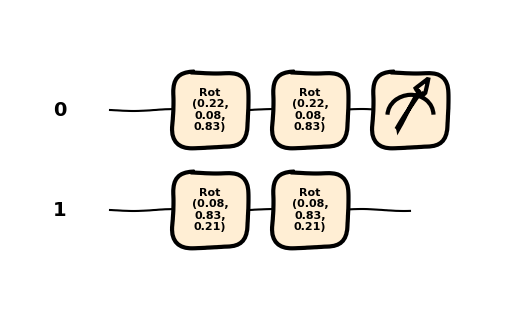

In [20]:
def quantum_kernel(params: np.ndarray,  wires: list):
    wires_length = len(wires)
    index_length = 4
    for i, l in zip(range(wires_length), range(index_length)):
        qml.Rot(phi=params[l+0], theta=params[l+1], omega=params[l+2], wires=i)

params = np.random.rand(6)

@qml.qnode(dev)
def circuit(params: np.ndarray, wires: list):
    quantum_kernel(params, wires=[wires[0],wires[1]])
    quantum_kernel(params, wires=[wires[2],wires[3]])
    return qml.probs(wires=0)

qml.draw_mpl(qnode=circuit, style="sketch", decimals=2)(params, [0,1,2,3])
plt.show()

In [22]:
@qml.qnode(dev)
def circuit(params: np.ndarray, wires: list):
    wires_length = 4
    index_length = 4
    for i, l in zip(range(wires_length), range(index_length)):
        qml.Rot(phi=params[l+0], theta=params[l+1], omega=params[l+2], wires=i)
    return qml.probs(wires=0)
qml.draw_mpl(qnode=circuit, style="sketch", decimals=2)(params, [0,1,2,3])
plt.show()

SyntaxError: invalid syntax (1303444008.py, line 6)

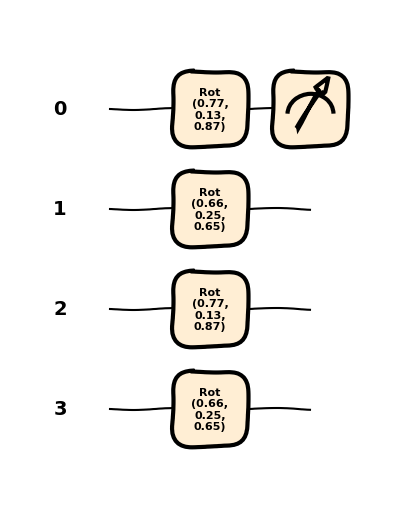

In [239]:
def quantum_kernel(params: np.ndarray, wires: list):
    wires_length = len(wires)
    x = 0
    for i in range(0, wires_length, 1):
        qml.Rot(phi=params[x+0], theta=params[x+1], omega=params[x+2], wires=[wires[i]])
        x += 3

params = np.random.rand(6)

@qml.qnode(dev)
def circuit(params: np.ndarray, wires: list):
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[2], wires[3]])
    return qml.probs(wires=0)

qml.draw_mpl(qnode=circuit, style="sketch", decimals=2)(params, [0, 1, 2, 3])
plt.show()

In [235]:
def Ising(type: str, control: int, target: int, weights: np.ndarray, weight_index: int) -> None:
    if type == 'XX':
        qml.CNOT(wires=[control, target])
        qml.RX(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])
    elif type == 'YY':
        qml.CNOT(wires=[control, target])
        qml.RY(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])
    elif type == 'ZZ':
        qml.CNOT(wires=[control, target])
        qml.RZ(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])

In [236]:
def pooling(wire_to_measure: int, weights: np.ndarray, weight_index: list) -> None:
    m_outcome = qml.measure(wire_to_measure)
    qml.cond(m_outcome, qml.Rot)(weights[weight_index[0]], weights[weight_index[1]], weights[weight_index[2]], wire_to_measure+1)

In [237]:
import tensorflow as tf
from keras.datasets import mnist

def downsample(x_array, size):
    newsize = (size, size)
    x_array = np.reshape(x_array, (x_array.shape[0], x_array.shape[1], 1))
    new_array = tf.image.resize(x_array, newsize)
    return new_array.numpy() 


def data(num_train_samples=None, num_test_samples=None, shuffle=False, resize=None): 
    (train_X, train_y), (test_X, test_y) = mnist.load_data()
    X_train_filtered = train_X[np.isin(train_y, [2, 5])]
    y_train_filtered = train_y[np.isin(train_y, [2, 5])]
    X_test_filtered = test_X[np.isin(test_y, [2, 5])]
    y_test_filtered = test_y[np.isin(test_y, [2, 5])]

    X_train_filtered = X_train_filtered.astype('float32') / 255
    X_test_filtered = X_test_filtered.astype('float32') / 255
    X_train_new = []
    X_test_new = []
    if resize is not None and resize <= 28:
        for train in X_train_filtered:
            X_train_new.append(downsample(train, resize))
        for test in X_test_filtered:
            X_test_new.append(downsample(test, resize))
    else: 
        raise Exception("The new size must be smaller than the actual Mnist size that is 28!")

    ### shuffle
    X_train_new = np.array(X_train_new)
    X_test_new = np.array(X_test_new)
    train_indices = np.arange(len(X_train_new))
    test_indices = np.arange(len(X_test_new))
    if shuffle == True:
        np.random.shuffle(train_indices)
        np.random.shuffle(test_indices)

    if num_train_samples is not None:
        X_train_ = np.array(X_train_new)[:num_train_samples]
        y_train_filtered = y_train_filtered[:num_train_samples]

    if num_test_samples is not None:
        X_test_ = np.array(X_test_new)[:num_test_samples]
        y_test_filtered = y_test_filtered[:num_test_samples]
        X_train_ = X_train_.reshape(X_train_.shape[0], X_train_.shape[1]*X_train_.shape[2])
        X_test_ = X_test_.reshape(X_test_.shape[0], X_test_.shape[1]*X_test_.shape[2])
    return (
        jnp.asarray(X_train_),
        jnp.asarray(y_train_filtered),
        jnp.asarray(X_test_),
        jnp.asarray(y_test_filtered),
    )

new_shape = 8
X_train, y_train, X_test, y_test = data(num_train_samples=400, num_test_samples=100, shuffle=True, resize=new_shape)

Text(0.5, 0, '2')

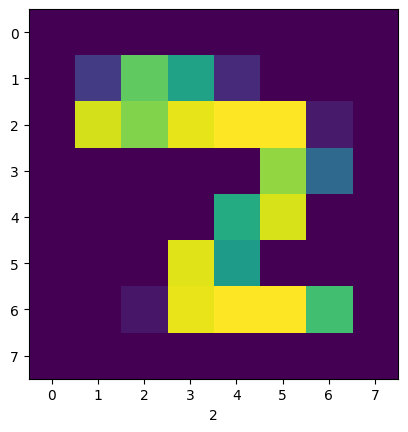

In [238]:
plt.imshow(X_train[5].reshape((8,8)))
plt.xlabel(y_train[5])

In [148]:
X_train[0].shape

(64,)

In [154]:
wires = [0,1,2,3,4,5]
num_wires = len(wires)

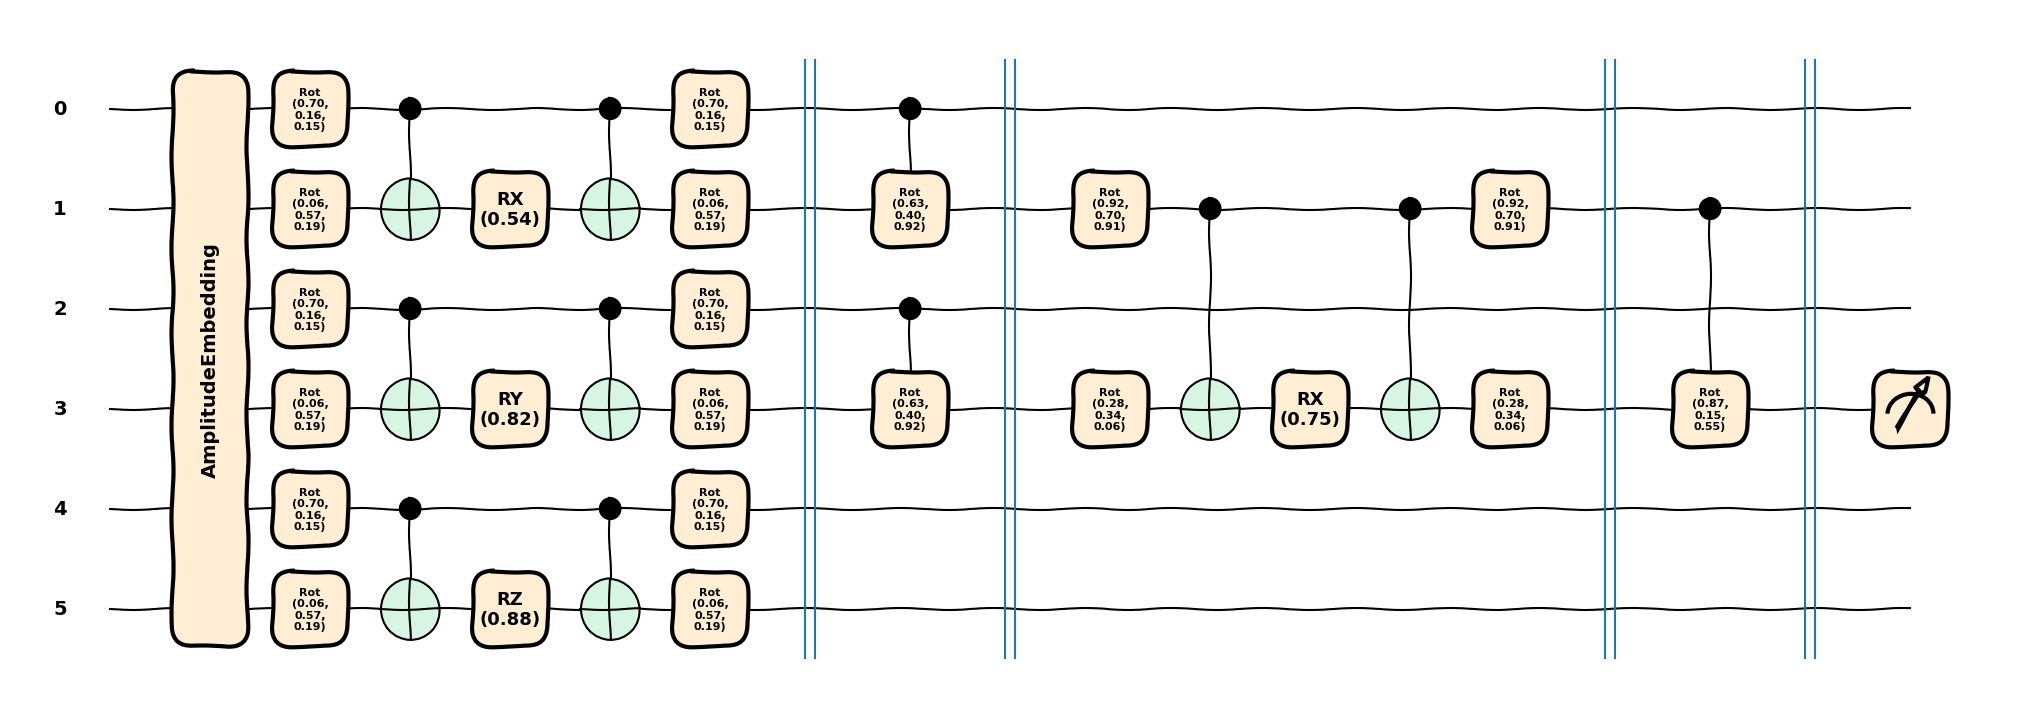

In [288]:
params = np.random.rand(42)
wires = [0,1,2,3,4,5]
num_wires = len(wires)
@qml.qnode(dev)
def circuit(params: np.ndarray, X):
    qml.AmplitudeEmbedding(features=X, wires=wires, pad_with=0.5)
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[4], wires[5]])
    Ising(type='XX', control=wires[0], target=wires[1], weights=params, weight_index=6)
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[2], wires[3]])
    Ising(type='YY', control=wires[2], target=wires[3], weights=params, weight_index=7)
    Ising(type='ZZ', control=wires[4], target=wires[5], weights=params, weight_index=8)
    quantum_kernel(params, wires=[wires[2], wires[3]])
    quantum_kernel(params, wires=[wires[4], wires[5]])
    qml.Barrier(only_visual=True)
    m_outcome1 = qml.measure(wires[0])
    m_outcome2 = qml.measure(wires[2])
    qml.cond(m_outcome1, qml.Rot)(params[20], params[21], params[22], wires[1])
    qml.cond(m_outcome2, qml.Rot)(params[20], params[21], params[22], wires[3])
    qml.Barrier(only_visual=True)
    quantum_kernel(params[33:], wires=[1,3])
    Ising(type='XX', control=wires[1], target=wires[3], weights=params, weight_index=32)
    quantum_kernel(params[33:], wires=[1,3])
    qml.Barrier(only_visual=True)
    m_outcome3 = qml.measure(wires[1])
    qml.cond(m_outcome3, qml.Rot)(params[39], params[40], params[41], wires[3])
    qml.Barrier(only_visual=True)
    return qml.probs(wires=3)

qml.draw_mpl(qnode=circuit, style="sketch", decimals=2)(params, np.random.rand(2 ** 6))
plt.show()

In [245]:
print(circuit(params, X_train[28]))

[0.37195779 0.62804218]


In [246]:
from sklearn.metrics import accuracy_score

In [247]:
def remap_labels(labels):
    """
    Remaps labels 2 and 5 to 0 and 1, respectively, while keeping other values unchanged.
    
    Args:
    - labels (jax.numpy.ndarray or list): Array or list of original labels
    
    Returns:
    - remapped_labels (jax.numpy.ndarray): Array of remapped labels
    """
    labels = jnp.array(labels)  # Convert to JAX NumPy array for efficient operations
    remapped_labels = jnp.where(labels == 2, 0, jnp.where(labels == 5, 1, labels))
    return remapped_labels

remapped_y_train = remap_labels(y_train)

In [197]:
remapped_y_train

Array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [249]:
@jax.jit
def compute_out(weights, features, labels):
    """Computes the output of the corresponding label in the qcnn"""
    cost = lambda weights, feature, label: circuit(weights, feature)
    return jax.vmap(cost, in_axes=(None, 0, 0), out_axes=0)(
        weights, features, labels
    )


def compute_cost(weights, features, labels):
    """Computes the cost over the provided features and labels"""
    out = compute_out(weights, features, labels)
    return 1.0 - jnp.sum(out) / len(labels)
    

def catecross(weights,  features, labels):
    labels = jnp.array(labels)
    loss = 0
    out = jnp.array(compute_out(weights,  features, labels))
    for l, p in zip(labels, out):
        loss += l * (jnp.log(p[l])) + (1 - l) * jnp.log(1 - p[1 - l])
    return -1 * jnp.sum(loss)/len(labels)

def calculate_accuracy(weights, features, labels):
    labels = jnp.array(labels)
    predictions = jnp.array(compute_out(weights, features, labels))
    predicted_labels = jnp.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, predicted_labels)
    return accuracy

In [261]:
def calculate_accuracy(weights, features, labels):
    labels = jnp.array(labels)
    predictions = jnp.array(compute_out(weights, features, labels))
    predicted_labels = jnp.argmax(predictions, axis=1)
    accuracy = (accuracy_score(labels, predicted_labels))
    return accuracy

In [250]:
value_and_grad = jax.jit(jax.value_and_grad(catecross))

In [278]:
def optimizer_update(opt_state, params, features, labels):
    loss_value, grads = jax.value_and_grad(lambda theta: catecross(weights, features, labels))(params)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss_value

In [252]:
from sklearn.utils import gen_batches

In [291]:
n_epochs = 400
seed = 448

key = jax.random.PRNGKey(seed)
initial_params = jax.random.normal(key, shape=(42,))
np.random.seed(7)
weights = jnp.copy((initial_params))
batch_size = 32
# learning rate decay
cosine_decay_scheduler = optax.cosine_decay_schedule(0.1, decay_steps=n_epochs, alpha=0.95)
optimizer = optax.adam(learning_rate=0.01)
opt_state = optimizer.init(initial_params)
train_cost_epochs, train_acc_epochs = [], []
for step in range(1,n_epochs+1):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(X_train.shape[0]))), shape=(X_train.shape[0],), replace=False)
    key = jax.random.split(key)[0]
    for i in gen_batches(X_train.shape[0], batch_size):
        idxs = idxs_dataset[i]
        train_cost, grad_circuit = value_and_grad(weights, X_train[idxs, :], remapped_y_train[idxs])
        #params, opt_state, cost = optimizer_update(opt_state, params, X_train[idxs, :], remapped_y_train[idxs])
        '''params, opt_state, cost = optimizer_update(opt_state, params, X_train, y_train)'''
    # Training step with (adam) optimizer
    #train_cost, grad_circuit = value_and_grad(weights, X_train, remapped_y_train)
    updates, opt_state = optimizer.update(grad_circuit, opt_state)
    weights = optax.apply_updates(weights, updates)
    train_cost_epochs.append(train_cost)

    #compute accuracy on training data
    train_acc = calculate_accuracy(weights, X_train, remapped_y_train)
    train_acc_epochs.append(train_acc)
    print(f"Epoch {step}:", "---Train loss:", train_cost, "---Train acc.:", train_acc)
    # Save the optimal weights
    optimal_weights = weights

Epoch 1: ---Train loss: 0.7074853545921573 ---Train acc.: 0.43
Epoch 2: ---Train loss: 0.7294315942128483 ---Train acc.: 0.435
Epoch 3: ---Train loss: 0.7446539537254406 ---Train acc.: 0.43
Epoch 4: ---Train loss: 0.7609348805447659 ---Train acc.: 0.43
Epoch 5: ---Train loss: 0.7129905249795893 ---Train acc.: 0.43
Epoch 6: ---Train loss: 0.6575875819194181 ---Train acc.: 0.43
Epoch 7: ---Train loss: 0.7058153328206667 ---Train acc.: 0.43
Epoch 8: ---Train loss: 0.648596753553184 ---Train acc.: 0.4275
Epoch 9: ---Train loss: 0.6514850562980721 ---Train acc.: 0.4375
Epoch 10: ---Train loss: 0.7102643502430572 ---Train acc.: 0.4425
Epoch 11: ---Train loss: 0.6764015223857649 ---Train acc.: 0.45
Epoch 12: ---Train loss: 0.6683704974464932 ---Train acc.: 0.4725
Epoch 13: ---Train loss: 0.7063710380718727 ---Train acc.: 0.4875
Epoch 14: ---Train loss: 0.7143015493850476 ---Train acc.: 0.5025
Epoch 15: ---Train loss: 0.6929156090072754 ---Train acc.: 0.525
Epoch 16: ---Train loss: 0.668049949

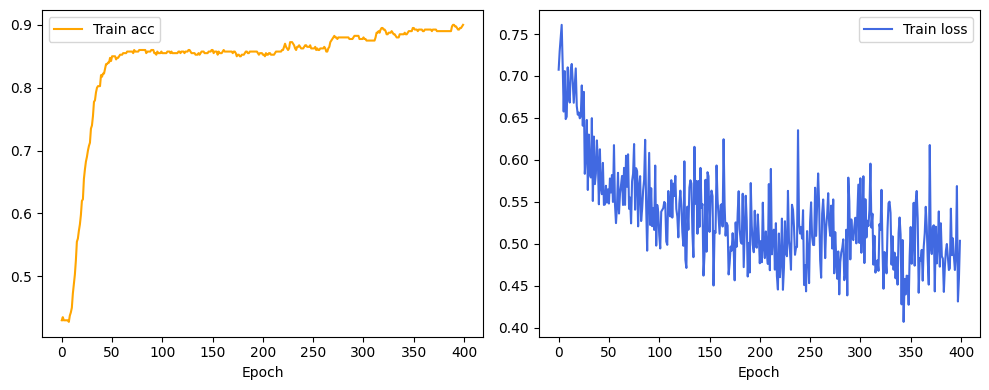

In [292]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(train_acc_epochs, label="Train acc", color="orange")
axs[0].set_xlabel("Epoch")
axs[1].plot(train_cost_epochs, label="Train loss", color="royalblue")
axs[1].set_xlabel("Epoch")
axs[0].legend(loc="best")
axs[1].legend(loc="upper right")
plt.tight_layout()

In [305]:
n_epochs = 400
seed = 4

key = jax.random.PRNGKey(seed)
initial_params = jax.random.normal(key, shape=(42,))
np.random.seed(8)
weights = jnp.copy(initial_params)
batch_size = 32
# learning rate decay
cosine_decay_scheduler = optax.cosine_decay_schedule(0.1, decay_steps=n_epochs, alpha=0.95)
optimizer = optax.adam(learning_rate=0.01)
opt_state = optimizer.init(initial_params)
train_cost_epochs, train_acc_epochs = [], []
cost_epoch = []
acc_epoch = []
for step in range(1, n_epochs + 1):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(X_train.shape[0]))), shape=(X_train.shape[0],), replace=False)
    key = jax.random.split(key)[0]
    
    epoch_loss = 0.0
    epoch_accuracy = 0.0

    for i in gen_batches(X_train.shape[0], batch_size):
        idxs = idxs_dataset[i]
        batch_features, batch_labels = X_train[idxs], remapped_y_train[idxs]

        # Compute the loss and gradient for the batch
        train_cost, grad_circuit = value_and_grad(weights, batch_features, batch_labels)

        # Update weights using the optimizer
        updates, opt_state = optimizer.update(grad_circuit, opt_state)
        weights = optax.apply_updates(weights, updates)

        # Compute accuracy for the batch
        batch_accuracy = calculate_accuracy(weights, batch_features, batch_labels)

        # Accumulate loss and accuracy for the epoch
        epoch_loss += train_cost
        epoch_accuracy += batch_accuracy

        # Append loss and accuracy for the batch
        train_cost_epochs.append(train_cost)
        train_acc_epochs.append(batch_accuracy)

    # Average loss and accuracy over all batches for the epoch
    epoch_loss /= (X_train.shape[0] / batch_size)
    epoch_accuracy /= (X_train.shape[0] / batch_size)
    cost_epoch.append(train_cost)
    acc_epoch.append(batch_accuracy)
    print(f"Epoch {step}:", "---Train loss:", epoch_loss, "---Train acc.:", epoch_accuracy)

    # Save the optimal weights (optional)
    optimal_weights = weights

Epoch 1: ---Train loss: 0.7147389373247438 ---Train acc.: 0.5775
Epoch 2: ---Train loss: 0.6834064864537343 ---Train acc.: 0.695
Epoch 3: ---Train loss: 0.6591111249170213 ---Train acc.: 0.745
Epoch 4: ---Train loss: 0.644052608741091 ---Train acc.: 0.765
Epoch 5: ---Train loss: 0.6326526059412112 ---Train acc.: 0.76
Epoch 6: ---Train loss: 0.6269383298812762 ---Train acc.: 0.7875
Epoch 7: ---Train loss: 0.6177368110266809 ---Train acc.: 0.8025
Epoch 8: ---Train loss: 0.6113094922645129 ---Train acc.: 0.805
Epoch 9: ---Train loss: 0.6036283538557629 ---Train acc.: 0.82
Epoch 10: ---Train loss: 0.5965806734848538 ---Train acc.: 0.8075
Epoch 11: ---Train loss: 0.5924438101835243 ---Train acc.: 0.8225
Epoch 12: ---Train loss: 0.5863710054802306 ---Train acc.: 0.8375
Epoch 13: ---Train loss: 0.5865411075478655 ---Train acc.: 0.84
Epoch 14: ---Train loss: 0.5837160944608449 ---Train acc.: 0.8475
Epoch 15: ---Train loss: 0.581505611037946 ---Train acc.: 0.86
Epoch 16: ---Train loss: 0.579291

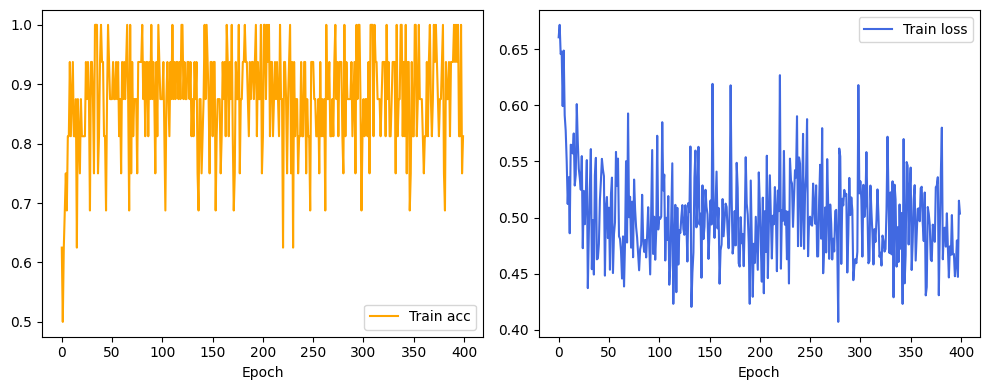

In [306]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(acc_epoch, label="Train acc", color="orange")
axs[0].set_xlabel("Epoch")
axs[1].plot(cost_epoch, label="Train loss", color="royalblue")
axs[1].set_xlabel("Epoch")
axs[0].legend(loc="best")
axs[1].legend(loc="upper right")
plt.tight_layout()

In [307]:
y_predicted = compute_out(optimal_weights, X_test, remap_labels(y_test))

In [308]:
y_predicted

Array([[0.48741135, 0.51258864],
       [0.40793225, 0.59206777],
       [0.41145116, 0.58854901],
       [0.38765841, 0.6123415 ],
       [0.55311553, 0.44688437],
       [0.564958  , 0.43504196],
       [0.70030175, 0.29969828],
       [0.36197884, 0.63802109],
       [0.56843623, 0.43156375],
       [0.34140254, 0.6585975 ],
       [0.34525237, 0.65474771],
       [0.59551323, 0.40448673],
       [0.67575561, 0.32424424],
       [0.49425284, 0.50574721],
       [0.66487034, 0.33512968],
       [0.21993824, 0.78006182],
       [0.48167758, 0.51832237],
       [0.47720723, 0.5227928 ],
       [0.29539058, 0.70460946],
       [0.34773757, 0.65226244],
       [0.53611492, 0.46388501],
       [0.30054913, 0.69945086],
       [0.66256504, 0.33743499],
       [0.57170227, 0.42829775],
       [0.36385009, 0.63614993],
       [0.29913185, 0.70086807],
       [0.33745578, 0.66254416],
       [0.38681661, 0.61318342],
       [0.33844067, 0.66155934],
       [0.57008704, 0.42991299],
       [0.

In [309]:
estimated_labels = jnp.array([jnp.argmax(label) for label in y_predicted])
print("Percentage of test images correctly predicted: ", accuracy_score(remap_labels(y_test), estimated_labels), "%")

Percentage of test images correctly predicted:  0.89 %


In [267]:
len(estimated_labels)

100

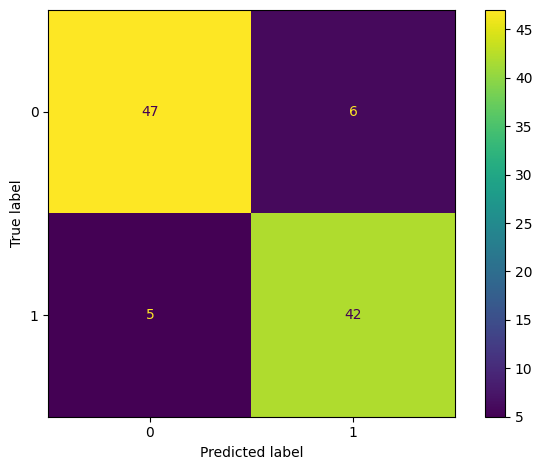

In [310]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(remap_labels(y_test), estimated_labels)).plot()
plt.tight_layout()

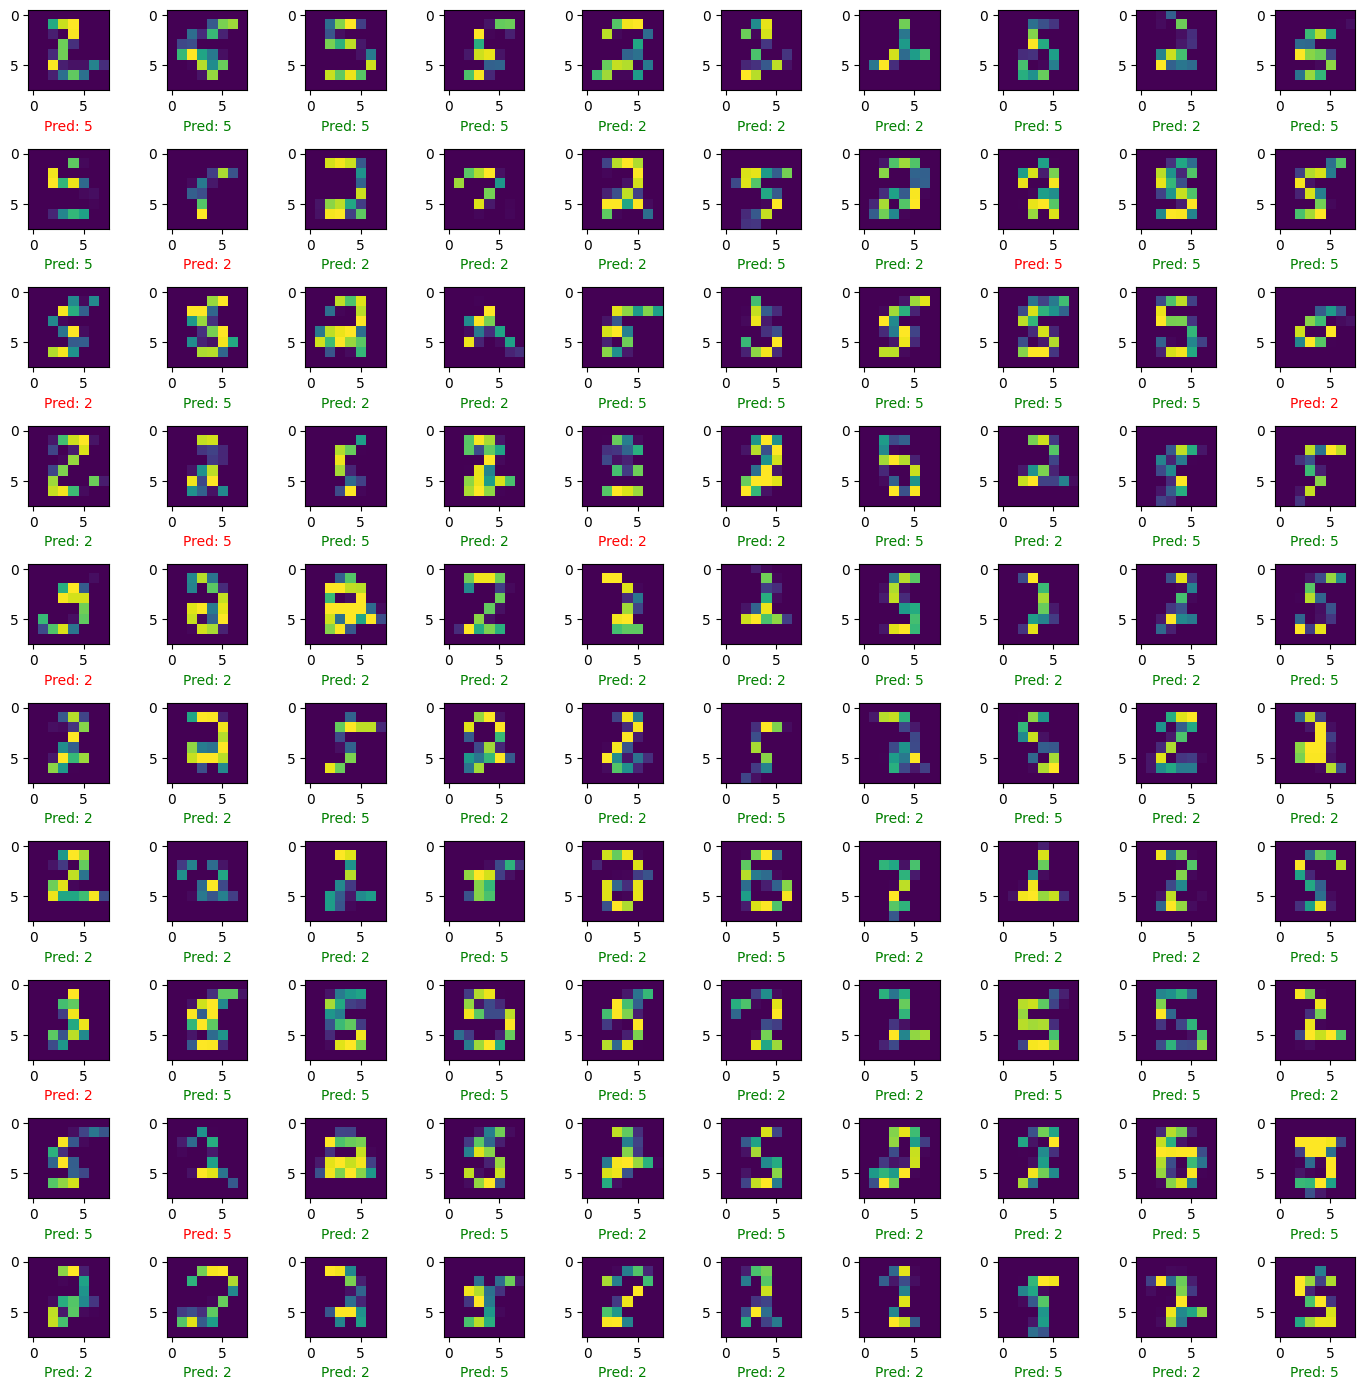

In [297]:
def plot_mnist_images(images, estimated_labels, num_images=100, num_cols=10):
    """
    Plot a grid of MNIST images.
    
    Args:
    - images (numpy.ndarray): Array of MNIST images
    - estimated_labels (numpy.ndarray): Array of estimated labels for the images
    - num_images (int): Number of images to plot (default is 100)
    - num_cols (int): Number of columns in the grid (default is 10)
    """
    actual_labels = jnp.where(estimated_labels == 0, 2, jnp.where(estimated_labels == 1, 5, estimated_labels))
    num_rows = num_images // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 14))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape((8, 8)), cmap='viridis')  # Corrected image shape
        label_color = 'green' if actual_labels[i] == y_test[i] else 'red'
        ax.set_xlabel("Pred: " + str(actual_labels[i]), color=label_color)  # Setting label color based on match
    plt.tight_layout()
    plt.show()

# Assuming X_test contains your MNIST images and estimated_labels contains the estimated labels
plot_mnist_images(X_test[:100], estimated_labels[:100])